In [1]:
# %load std_libraries.py
#to keep my scripts consistent, I am adding this to the top of all scripts with %load std_libraries.py
import sys
#Indicate operating environment and import core modules
location_input = input("what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other")
location_dict = {'a': "C:\\Users\\BMH_work\\github\\expression_broad_data", 'b': "/home/heineike/github/expression_broad_data",
                 'c': "C:\\Users\\Ben\\Documents\\GitHub\\expression_broad_data", 'd':'you need to add your location to the location_dict'}
base_dir = location_dict[location_input]
print("base directory is " + base_dir)

if sys.path[-1] != base_dir:
    sys.path.append(base_dir)
    print("Added " + base_dir + " to path: " )
    print(sys.path)

import os

print("I am about to import a library")
from core import expression_plots 
from core import io_library 
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
#%matplotlib inline
%matplotlib notebook
data_processing_dir = base_dir + os.sep + os.path.normpath("expression_data") + os.sep

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.colormap as cm
from matplotlib_venn import venn2
from matplotlib_venn import venn3
#for my windows computer I had to install this package using pip rather than anaconda.  I got this error message: 
#twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
#import seaborn as sns; sns.set(style="ticks", color_codes=True)
#from sklearn import linear_model
#import pickle
#import subprocess
#import networkx as nx
#import scipy.stats as stats
#import statsmodels.graphics.gofplots as stats_graph
#import scipy.cluster.hierarchy as sch

# from Bio import SeqIO
# from Bio import SeqFeature as sf
# from Bio.Alphabet import generic_dna
# from Bio.Seq import Seq

# import re

from collections import Counter
# import scipy.stats as stats
# from itertools import chain
#from itertools import product
#this only works if you are online
online_input = input("are you online? Yes/No")
if online_input == "Yes": 
    import plotly.plotly as py
    import plotly.graph_objs as pygo
    import plotly.tools as pytools
    py.sign_in('heineike02_student','9dMTMZgJMgUP0YX0P5mQ')
    #py.sign_in('heineike02', 'APPjKrtARaN2ZgUYIkqr')
    
# for phylogenetic trees: 
# from ete3 import Tree

#for scraping internet data (e.g. ncbi)
#import requests
#from lxml import etree    #parses xml output

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
Added C:\Users\BMH_work\github\expression_broad_data to path: 
['', 'C:\\Users\\BMH_work\\github\\expression_broad_data\\scripts', 'C:\\Users\\BMH_work\\Anaconda3\\python37.zip', 'C:\\Users\\BMH_work\\Anaconda3\\DLLs', 'C:\\Users\\BMH_work\\Anaconda3\\lib', 'C:\\Users\\BMH_work\\Anaconda3', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\BMH_work\\.ipython', 'C:\\Users\\BMH_work\\github\\expression_broad_data']
I am about to import a library
I am importing io_library
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = other

In [2]:
##Compare LFC between last year and this year for AS + 1/NMPP1

#Load DEseq data for AS +/- drug

pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_nmpp1.csv'), index_col=0)

#Load DEseq data from 2017 for AS +/-drug

pkainh_deseq_2017 = pd.read_csv(os.path.normpath(data_processing_dir + '\\20170817_klscpka\\20170817_klscpka_DESEQ_YPD_t40_ASMinvASPlus_SC.csv'), index_col=0)

pkainh_deseq_merged = pkainh_deseq.merge(pkainh_deseq_2017, left_index=True, right_index=True, how = 'outer', suffixes = ('','_2017')) 


#Add column for common names
pkainh_deseq_merged['SC_common_name'] = io_library.SC_common_name_lookup(pkainh_deseq_merged.index)

for column in ['log2FoldChange', 'log2FoldChange_2017']: 
    pkainh_deseq_merged[column] = pkainh_deseq_merged[column].fillna(0.0)

In [20]:
spec = 'SC'

data = []

xlabel = 'LFC AS -/+ Nmpp1 2017'
ylabel = 'LFC AS -/+ Nmpp1'

trace = pygo.Scatter(
            x = pkainh_deseq_merged['log2FoldChange_2017'], 
            y =  pkainh_deseq_merged['log2FoldChange'],
            text = pkainh_deseq_merged['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'SC_AS_pmNMPP1_2017LFC_V2018')

In [3]:
#Load DEseq data for SCer Rph1/Gis1 delete experiment

r1g1_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_WT_wtVr1g1.csv'), index_col=0)

#Add column for common names
r1g1_deseq['SC_common_name'] = io_library.SC_common_name_lookup(r1g1_deseq.index)


#Load DEseq data for SCer Msn24/drug interaction contrast
m24_nmpp1_int_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_m24del_nmpp1_interaction.csv'), index_col=0)

#Add column for common names
m24_nmpp1_int_deseq['SC_common_name'] = io_library.SC_common_name_lookup(m24_nmpp1_int_deseq.index)


#Load DEseq data for SCer Msn2/4 delete in WT experiment

m24_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_WT_wtVm24.csv'), index_col=0)

#Add column for common names
m24_deseq['SC_common_name'] = io_library.SC_common_name_lookup(m24_deseq.index)




In [4]:
#Plot Deseq LFC v.s. pValue

#Plot raw expression for various gene sets

# hover_text = []
# for ind, row in kl_sc_PKA_data.iterrows():
#     hover_text.append(('{SC_common_name}<br>kl cont: {klmin:.2f}<br>kl nmpp1: {klnmpp1:.2f}').format(
#                               SC_common_name=row['SC_common_name'],
#                               klmin = row['rlog_AS_noNMPP1_YPD_t40_mean_KL'],
#                               klnmpp1 = row['rlog_AS_yesNMPP1_YPD_t40_mean_KL']
#                               ))

# kl_sc_PKA_data['hover'] = hover_text

# cmap = cm.get_cmap('tab10')

data = []

trace = pygo.Scatter(
            x = r1g1_deseq['log2FoldChange'], 
            y =  -np.log10(r1g1_deseq['pvalue']),
            text = r1g1_deseq['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'WT VS Rph1/Gis1 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_WT_VS_R1G1_UTR')




In [17]:
#To Call Rph1/Gis1 repressed genes make a line from (1.5, 3) to (3.0, 0) and a hard cutoff below of 0.5

x1,y1 = (1.2,3.4)
x2,y2 = (2.2,0.0)
ymin = 0.5

x = r1g1_deseq['log2FoldChange']
y =  -np.log10(r1g1_deseq['pvalue'])

r1g1_rep_genes = r1g1_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]

In [18]:
len(r1g1_rep_genes)

123

In [8]:
#Plot Msn24/nmpp1 interaction LFC v.s. pValue


data = []

trace = pygo.Scatter(
            x = m24_nmpp1_int_deseq['log2FoldChange'], 
            y =  -np.log10(m24_nmpp1_int_deseq['pvalue']),
            text = m24_nmpp1_int_deseq['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'Msn24 drug interaction term'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_Msn24_drug_interaction_UTR')


In [6]:
#To Call Msn2/4 PKA interaction genes make a line from (-4.5, 0) to (-1.9, 7.5) and a hard cutoff for -log10p value of above 1.0

x1,y1 = (-4.0,0.0)
x2,y2 = (-2.4,16.5)
ymin = 1.0

x = m24_nmpp1_int_deseq['log2FoldChange']
y =  -np.log10(m24_nmpp1_int_deseq['pvalue'])

m24_nmpp1_act_genes = m24_nmpp1_int_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]

In [10]:
#Plot Deseq LFC v.s. pValue

#Plot raw expression for various gene sets

# hover_text = []
# for ind, row in kl_sc_PKA_data.iterrows():
#     hover_text.append(('{SC_common_name}<br>kl cont: {klmin:.2f}<br>kl nmpp1: {klnmpp1:.2f}').format(
#                               SC_common_name=row['SC_common_name'],
#                               klmin = row['rlog_AS_noNMPP1_YPD_t40_mean_KL'],
#                               klnmpp1 = row['rlog_AS_yesNMPP1_YPD_t40_mean_KL']
#                               ))

# kl_sc_PKA_data['hover'] = hover_text

# cmap = cm.get_cmap('tab10')

data = []

trace = pygo.Scatter(
            x = m24_deseq['log2FoldChange'], 
            y =  -np.log10(m24_deseq['pvalue']),
            text = m24_deseq['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'WT VS Msn2/4 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_WT_VS_M24_UTR')


In [7]:
#To Call Msn2/4 deletion genes make a line from and a hard cutoff for -log10p value of above 0.5. 
#This was chosen to include CYC7 and HOR7 but not MPC3. 

x1,y1 = (-2.1,0.2)
x2,y2 = (-1.1,4.5)
ymin = 0.5

x = m24_deseq['log2FoldChange']
y =  -np.log10(m24_deseq['pvalue'])

m24_act_genes = m24_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]


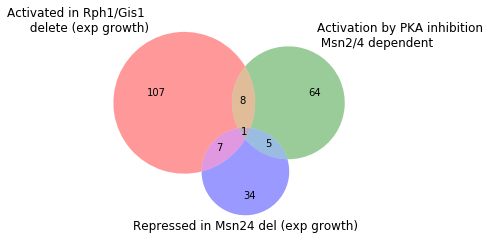

In [21]:
venn3([set(r1g1_rep_genes.index), set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = ['Activated in Rph1/Gis1 \n delete (exp growth)', 'Activation by PKA inhibition \n Msn2/4 dependent', 'Repressed in Msn24 del (exp growth)'])

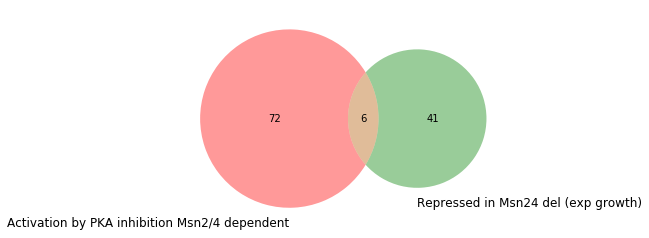

In [14]:
venn2([ set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = [ 'Activation by PKA inhibition Msn2/4 dependent', 'Repressed in Msn24 del (exp growth)'])

In [10]:
#Repressed in Msn2/4 Delete basally
len(list(set(m24_act_genes.index)))

47

In [13]:
#Repressed in Msn2/4 Delete basally
list(set(m24_nmpp1_act_genes.index))

['YCR045C',
 'YOR173W',
 'YHR097C',
 'YAL054C',
 'YMR133W',
 'YDR453C',
 'YJR096W',
 'YDR536W',
 'YER121W',
 'YMR118C',
 'YKL065W-A',
 'YML099W-A',
 'YML100W',
 'YFL030W',
 'YNL093W',
 'YBR116C',
 'YBL075C',
 'YKL151C',
 'YMR174C',
 'YDL223C',
 'YHR087W',
 'YMR107W',
 'YPL223C',
 'YBR117C',
 'YJR155W',
 'YMR090W',
 'YLR164W',
 'YCR083W',
 'YDR256C',
 'YHR139C',
 'YGR256W',
 'YDR193W',
 'YBR186W',
 'YFL015C',
 'YGR174W-A',
 'YDR119W-A',
 'YDR034W-B',
 'YNL195C',
 'YJL045W',
 'YPL186C',
 'YHR193C-A',
 'YBR072W',
 'YGR043C',
 'YMR169C',
 'YIL136W',
 'YER103W',
 'YMR206W',
 'YDL204W',
 'YDR070C',
 'YER084W-A',
 'YGR201C',
 'YGR248W',
 'YBR221W-A',
 'YLR311C',
 'YDR506C',
 'YOR120W',
 'YMR105C',
 'YDR491C',
 'YPL036W',
 'YDL222C',
 'YHR096C',
 'YOL084W',
 'YOR382W',
 'YMR175W',
 'YDR533C',
 'YDL085W',
 'YKL163W',
 'YKL187C',
 'YOL052C-A',
 'YCL048W-A',
 'YDR048C',
 'YDR010C',
 'YIL160C',
 'YER068C-A',
 'YGR008C',
 'YML128C',
 'YGR088W',
 'YNR034W-A']

In [27]:
set(r1g1_rep_genes.index)

{'YAL005C',
 'YBR006W',
 'YBR054W',
 'YBR072W',
 'YBR111W-A',
 'YBR183W',
 'YBR214W',
 'YBR269C',
 'YBR280C',
 'YBR285W',
 'YCL012C',
 'YCL033C',
 'YCL044C',
 'YCR025C',
 'YCR083W',
 'YDL021W',
 'YDL022W',
 'YDL085W',
 'YDL110C',
 'YDL130W-A',
 'YDL169C',
 'YDR178W',
 'YDR277C',
 'YDR358W',
 'YDR379C-A',
 'YDR461W',
 'YDR470C',
 'YDR513W',
 'YDR516C',
 'YEL012W',
 'YEL039C',
 'YER011W',
 'YER035W',
 'YER037W',
 'YER039C',
 'YER053C-A',
 'YER062C',
 'YER096W',
 'YGL032C',
 'YGL037C',
 'YGL156W',
 'YGL180W',
 'YGL227W',
 'YGR052W',
 'YGR053C',
 'YGR066C',
 'YGR088W',
 'YGR149W',
 'YGR194C',
 'YGR222W',
 'YHL044W',
 'YHL045W',
 'YHR008C',
 'YHR092C',
 'YHR096C',
 'YHR113W',
 'YHR140W',
 'YHR171W',
 'YHR199C-A',
 'YIL055C',
 'YIL099W',
 'YIL100C-A',
 'YIL101C',
 'YIL113W',
 'YIR017C',
 'YIR037W',
 'YJL062W-A',
 'YJL070C',
 'YJL089W',
 'YJL163C',
 'YJL164C',
 'YJR019C',
 'YKL062W',
 'YKL103C',
 'YKL123W',
 'YKL148C',
 'YKR011C',
 'YKR098C',
 'YLL041C',
 'YLR012C',
 'YLR030W',
 'YLR031W',
 '

In [23]:
#repressed by Msn24 deletion
#repressed by Rph1/Gis1 deletion
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) & set(m24_act_genes.index)))

['CYC7', 'YLR031W', 'YCR025C', 'PNC1', 'GPD1', 'DDR2', 'GRX2', 'YHL045W']

In [22]:
#repressed by Rph1/Gis1 deletion
#activated by PKA inhibition, Msn2/4 dependent
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) & set(m24_nmpp1_act_genes.index)))

['TRX3', 'SIP18', 'CTT1', 'PGM2', 'NDE2', 'HSP26', 'GRE1', 'DDR2', 'HXT5']

In [28]:
io_library.SC_common_name_lookup(list(set(m24_nmpp1_act_genes.index) & set(m24_act_genes.index)))

['RTC3', 'EGO4', 'STF2', 'YPT53', 'FAT3', 'DDR2']

In [16]:
#r1g1 repressed and not m24 nmpp1 activated
io_library.SC_common_name_lookup(list(set(r1g1_rep_genes.index) - set(m24_nmpp1_act_genes.index)))

['TFS1',
 'YLR297W',
 'YAH1',
 'UBC8',
 'PNS1',
 'MXR2',
 'VID30',
 'YER010C',
 'GRE2',
 'PNC1',
 'TIR1',
 'YPC1',
 'YJL163C',
 'YCL012C',
 'YBR285W',
 'GRX2',
 'YLR108C',
 'TES1',
 'YGR053C',
 'MAM3',
 'FMP33',
 'PHM8',
 'APE4',
 'YLR031W',
 'SUS1',
 'YGR149W',
 'SDH2',
 'SDH8',
 'YCR101C',
 'YTP1',
 'YRO2',
 'HVG1',
 'XKS1',
 'YLR345W',
 'YNL011C',
 'SOD2',
 'PEX30',
 'SSA1',
 'GPP2',
 'COA3',
 'YNL194C',
 'YLR149C',
 'FRQ1',
 'YIL055C',
 'SOL2',
 'YER053C-A',
 'PEP4',
 'GSP2',
 'YPR098C',
 'GPD1',
 'AQY1',
 'LEE1',
 'MFA1',
 'CSI1',
 'PBI2',
 'UGX2',
 'ATG34',
 'UGA2',
 'TMA17',
 'YNL092W',
 'MSN4',
 'MET28',
 'YOR020W-A',
 'PRM1',
 'AMS1',
 'SHC1',
 'YML089C',
 'SDH1',
 'SDH6',
 'YKL123W',
 'COS111',
 'UBP11',
 'GGA1',
 'ULA1',
 'MGR1',
 'ECM21',
 'YGR066C',
 'YHL044W',
 'SGA1',
 'XBP1',
 'SDH4',
 'AGA2',
 'FMP48',
 'HXT4',
 'MRPS12',
 'STB2',
 'RNY1',
 'GAD1',
 'AVO2',
 'APE1',
 'STF1',
 'CYC7',
 'UGO1',
 'SAF1',
 'YCR025C',
 'YGP1',
 'ODC1',
 'COQ11',
 'YNL115C',
 'GPM2',
 'YHR14

In [17]:
io_library.SC_common_name_lookup(list(set(m24_nmpp1_act_genes.index) - set(r1g1_rep_genes.index)))

['REC114',
 'HBT1',
 'PAI3',
 'YJR096W',
 'PHM7',
 'YDR193W',
 'FMP16',
 'YMR090W',
 'FAT3',
 'SHH3',
 'SPS100',
 'TKL2',
 'COX26',
 'YER084W-A',
 'FIT2',
 'STF2',
 'RRT12',
 'YJL045W',
 'PMA2',
 'SOL4',
 'GND2',
 'YDR048C',
 'YBR221W-A',
 'SHH4',
 'PCH2',
 'YGR174W-A',
 'OM45',
 'YDR034W-B',
 'SPG4',
 'YDR491C',
 'YLR311C',
 'EGO4',
 'YCL048W-A',
 'YNL195C',
 'NQM1',
 'RTC3',
 'FMP45',
 'TSA2',
 'YKL065W-A',
 'GMC1',
 'YBR116C',
 'YHR193C-A',
 'POT1',
 'YML099W-A',
 'SSA3',
 'ALD3',
 'SSA4',
 'YDR010C',
 'DCS2',
 'YMR206W',
 'RTN2',
 'YER068C-A',
 'AGX1',
 'CTA1',
 'PIR3',
 'GCY1',
 'UIP4',
 'YPT53',
 'YKL151C',
 'HSP31',
 'MSC1',
 'AAD10',
 'YHR097C',
 'YGR201C',
 'YER121W',
 'YFL015C',
 'STL1']

In [16]:
r1g1_m24int_merge.columns

Index(['baseMean_RGrep', 'log2FoldChange_RGrep', 'lfcSE_RGrep', 'stat_RGrep',
       'pvalue_RGrep', 'padj_RGrep', 'SC_common_name_RGrep',
       'baseMean_M24_act', 'log2FoldChange_M24_act', 'lfcSE_M24_act',
       'stat_M24_act', 'pvalue_M24_act', 'padj_M24_act',
       'SC_common_name_M24_act'],
      dtype='object')

In [22]:
#Plot LFC of RG activation v.s. M24 drug interaction

r1g1_m24int_merge = r1g1_deseq.merge(m24_nmpp1_int_deseq, how='inner',suffixes= ('_RGrep','_M24act'),left_index=True, right_index=True)


data = []

trace = pygo.Scatter(
            x = r1g1_m24int_merge['log2FoldChange_RGrep'], 
            y =  r1g1_m24int_merge['log2FoldChange_M24act'],
            text = r1g1_m24int_merge['SC_common_name_RGrep'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'Rph1/Gis1 repressed LFC vs Msn24_PKA activation LFC'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        "range":[-20, 20],
        "title":'Rph1/Gis1 del v.s. WT LFC'
    },
    yaxis= {
        "range":[-10, 10],
        "title":'Msn24 del/PKA inhibition interaction term LFC'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_R1G1rep_v_M24PKAact')

In [23]:
r1g1_m24int_merge[r1g1_m24int_merge['SC_common_name_M24act']=='HSP12']

,baseMean_RGrep,log2FoldChange_RGrep,lfcSE_RGrep,stat_RGrep,pvalue_RGrep,padj_RGrep,SC_common_name_RGrep,baseMean_M24act,log2FoldChange_M24act,lfcSE_M24act,stat_M24act,pvalue_M24act,padj_M24act,SC_common_name_M24act
YFL014W,48.704855,-0.821724,0.575935,-1.426765,0.153648,0.99735,HSP12,4586.58369,-3.874665,1.27219,-3.045665,0.002322,0.031496,HSP12


## Promoter analysis of various groups

In [7]:
#Read in the SC promoter database.  
sc_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("sc_promoters/sc_promoters.pkl"))

In [15]:
#Make promoter files for different sets

genesets = {'r1g1_rep': r1g1_rep_genes.index, 'm24_act': m24_act_genes.index, 'm24_nmpp1_act': m24_nmpp1_act_genes.index}

for name, geneset in genesets.items(): 
    target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_20181101_' + name + '.fasta')
    io_library.write_promoter_file(sc_promoters, geneset,target_promoter_fname)

tD(GUC)I1 not in promoter data set.
tE(UUC)K not in promoter data set.
tT(AGU)O2 not in promoter data set.
tV(AAC)M3 not in promoter data set.
tS(AGA)D2 not in promoter data set.


## Looking at rLog data


In [2]:
#See what AS+ in RG and no deletion backgrounds looks like
#should also do this with DEseq

#20181017_metadata_V2_postseq
rlog_all = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_all_SC.csv'), index_col=0)
metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC.csv'), index_col=0)
#metadata_SC_orig = metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC_orig.csv'), index_col=0)

In [113]:
x1_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']=='3') &
                          (metadata_SC_orig['pka_AS_mut']=='WT')
                         ]
x1 = rlog_all.loc[:,str(x1_ind.index[0])]
#and metadata_SC_orig['replicate']=='3' and metadata_SC_orig['pka_AS_mut']=='WT']

15S_rRNA      1.802902
21S_rRNA      9.582057
HRA1         -2.399028
ICR1          1.595374
LSR1          8.165509
NME1          3.299077
PWR1         -0.953299
Q0045         0.154474
Q0050        10.028042
Q0055         6.230309
Q0060         1.964555
Q0065         0.558057
Q0070         0.737962
Q0075         1.495139
Q0085        -0.619231
Q0110         0.686173
Q0115         0.117339
Q0120         3.642737
Q0130        -1.217843
Q0160         4.877533
Q0250         1.370274
Q0255        -2.407213
Q0275        -2.101340
RDN5-1       -2.405749
RNA170        2.181957
RPR1          6.530175
RUF20         3.166849
RUF21        -2.284272
RUF22        -2.415434
RUF23         3.274627
               ...    
tV(AAC)G1    -1.519251
tV(AAC)G2    -2.112401
tV(AAC)G3     1.852160
tV(AAC)H     -2.358424
tV(AAC)J     -2.277184
tV(AAC)K2     3.503572
tV(AAC)L      4.525385
tV(AAC)M1    -1.376869
tV(AAC)M2     0.726713
tV(AAC)M3    -0.591881
tV(AAC)O      3.886120
tV(CAC)D     -0.936601
tV(CAC)H   

In [133]:
ax.text?

In [132]:
'{:0.2f}'.format(np.corrcoef(x,y1)[0,1])

'0.96'

Text(0.5,0.98,'RGM24_cont')

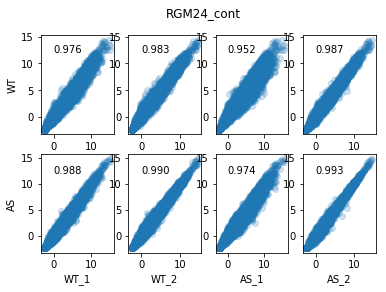

In [143]:
#Look at scatter of rlog for replicate 3 vs 2 and 1

#for nmpp1 in ['cont', 'drug']:
#for tf_del in ['WT','RG','M24','RGM24']

nmpp1 = 'cont'
tf_del = 'RGM24'


fig, axarr = plt.subplots(2,4)

y1_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']=='3') &
                          (metadata_SC_orig['pka_AS_mut']=='WT')
                         ]
y1 = rlog_all.loc[:,str(y1_ind.index[0])]


y2_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']=='3') &
                          (metadata_SC_orig['pka_AS_mut']=='AS')
                         ]
y2 = rlog_all.loc[:,str(y2_ind.index[0])]

jj = 0
for pka_as_mut in ['WT','AS']:
    for replicate in ['1','2']:
        x_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']==replicate) &
                          (metadata_SC_orig['pka_AS_mut']==pka_as_mut)
                         ]
        x = rlog_all.loc[:,str(x_ind.index[0])]
        
        ax = axarr[0,jj]
        ax.scatter(x,y1,alpha = 0.2)
        if jj==0:
            ax.set_ylabel('WT')
        ax.text(0,12,'{:0.3f}'.format(np.corrcoef(x,y1)[0,1]))
        
        ax = axarr[1,jj]
        if jj==0:
            ax.set_ylabel('AS')
        ax.scatter(x,y2,alpha = 0.2)
        
        ax.text(0,12,'{:0.3f}'.format(np.corrcoef(x,y2)[0,1]))
        
        ax.set_xlabel(pka_as_mut + '_' + replicate)
        
        jj = jj + 1
        
fig.suptitle(tf_del + '_' + nmpp1)


In [87]:
metadata_SC

#remove biological replicates
metadata_SC_noBR = metadata_SC[metadata_SC['replicate']!='BR'].copy()

#make a label that represents background mutation, deletion, and presence of drug
metadata_SC_noBR['pka_AS_mut__tf_del__NMPP1'] = metadata_SC['pka_AS_mut'] + '_' + metadata_SC['tf_del'] + '_' + metadata_SC['NMPP1'] 

metadata_SC_noBR['I7 index str'] = [str(ind) for ind in metadata_SC_noBR.index]
metadata_SC_noBR.set_index('I7 index str', inplace=True)

#group samples by mutation, deletion and presence of drug and take mean and variance.  Save as a .csv
rlog_data_metadata = metadata_SC_noBR.loc[:,['pka_AS_mut__tf_del__NMPP1']].merge(rlog_all.T,how = 'left', left_index = True, right_index = True)
rlog_data_grouped = rlog_data_metadata.groupby(by=['pka_AS_mut__tf_del__NMPP1'])
rlog_data_grouped_mean = rlog_data_grouped.agg('mean').T
rlog_data_grouped_var = rlog_data_grouped.agg('var').T
rlog_data_mean_var = rlog_data_grouped_mean.merge(rlog_data_grouped_var, how = 'inner', left_index = True, right_index = True, suffixes=['_mean', '_var'])

rlog_data_mean_var['SC_common_name'] = io_library.SC_common_name_lookup(rlog_data_mean_var.index)
rlog_data_mean_var.to_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_mean_SC.csv' ))


In [88]:
#Load mean rlog data
rlog_data_mean_var = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_mean_SC.csv' ),index_col=0)



In [90]:
rlog_data_mean_var.columns

Index(['AS_M24_cont_mean', 'AS_M24_drug_mean', 'AS_RGM24_cont_mean',
       'AS_RGM24_drug_mean', 'AS_RG_cont_mean', 'AS_RG_drug_mean',
       'AS_WT_cont_mean', 'AS_WT_drug_mean', 'WT_M24_cont_mean',
       'WT_M24_drug_mean', 'WT_RGM24_cont_mean', 'WT_RGM24_drug_mean',
       'WT_RG_cont_mean', 'WT_RG_drug_mean', 'WT_WT_cont_mean',
       'WT_WT_drug_mean', 'AS_M24_cont_var', 'AS_M24_drug_var',
       'AS_RGM24_cont_var', 'AS_RGM24_drug_var', 'AS_RG_cont_var',
       'AS_RG_drug_var', 'AS_WT_cont_var', 'AS_WT_drug_var', 'WT_M24_cont_var',
       'WT_M24_drug_var', 'WT_RGM24_cont_var', 'WT_RGM24_drug_var',
       'WT_RG_cont_var', 'WT_RG_drug_var', 'WT_WT_cont_var', 'WT_WT_drug_var',
       'SC_common_name'],
      dtype='object')

In [92]:
spec = 'SC'

data = []

xlabel = 'AS_WT_drug_mean'
ylabel = 'AS_RG_drug_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [93]:
spec = 'SC'

data = []

xlabel = 'AS_WT_cont_mean'
ylabel = 'AS_RG_cont_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [94]:
spec = 'SC'

data = []

xlabel = 'WT_WT_cont_mean'
ylabel = 'WT_RG_cont_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [95]:
spec = 'SC'

data = []

xlabel = 'WT_WT_cont_mean'
ylabel = 'AS_WT_cont_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [27]:
?pd.MultiIndex
#metadata_SC['pka_AS_mut'] + '_' + metadata_SC['tf_del'] + '_' + metadata_SC['NMPP1'] 

## Comparing pre to post UTR data

In [ ]:
#compare raw counts (logged with pseudocount) (as -drug, as +drug)

#load raw counts 





In [ ]:
#compare rlog data